## Feature Engineering for Energy Consumption Forecasting

- In this notebook, I will create new features to enhance the predictive power of our energy consumption forecasting models on East PJm and Western PJM..  
- Feature engineering involves transforming raw data into meaningful inputs that help machine learning algorithms capture patterns, trends, and seasonality.  
- I will extract time-based features, generate lagged variables, rolling statistics, and other relevant attributes to improve model accuracy and performance.

In [1]:
import pandas as pd

In [8]:
# Load the datasets
pjm_east = pd.read_csv(r'C:\Users\himan\Desktop\Projects\Energy_Forecasting_System\data\raw-data\csv_files\PJME_hourly.csv')  # replace with actual path
pjm_west = pd.read_csv(r'C:\Users\himan\Desktop\Projects\Energy_Forecasting_System\data\raw-data\csv_files\PJMW_hourly.csv')  # replace with actual path

# Convert 'Datetime' column to datetime format for both datasets
pjm_east['Datetime'] = pd.to_datetime(pjm_east['Datetime'])
pjm_west['Datetime'] = pd.to_datetime(pjm_west['Datetime'])

# Merge the datasets on the 'Datetime' column
df = pd.merge(pjm_east, pjm_west, on='Datetime', how='inner')  # 'inner' ensures only matching dates are kept

In [9]:
## sorting the pjm data by datetime
df.sort_values(by='Datetime', inplace=True)

In [10]:
df.head()

,Datetime,PJME_MW,PJMW_MW
6574,2002-04-01 01:00:00,21734.0,4374.0
6575,2002-04-01 02:00:00,20971.0,4306.0
6576,2002-04-01 03:00:00,20721.0,4322.0
6577,2002-04-01 04:00:00,20771.0,4359.0
6578,2002-04-01 05:00:00,21334.0,4436.0


In [11]:
df.shape

(143214, 3)

In [20]:
## converting df["Datetime"] to datetime format
# Convert 'Datetime' column to datetime format if it isn't already
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set the 'Datetime' column as the index
df.set_index('Datetime', inplace=True)

##### Extracting time-based feature

In [21]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [22]:
assert isinstance(df.index, pd.DatetimeIndex)

In [23]:
print(df[['hour', 'dayofweek', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear']].head())

                     hour  dayofweek  month  year  dayofyear  dayofmonth  \
Datetime                                                                   
2002-04-01 01:00:00     1          0      4  2002         91           1   
2002-04-01 02:00:00     2          0      4  2002         91           1   
2002-04-01 03:00:00     3          0      4  2002         91           1   
2002-04-01 04:00:00     4          0      4  2002         91           1   
2002-04-01 05:00:00     5          0      4  2002         91           1   

                     weekofyear  
Datetime                         
2002-04-01 01:00:00          14  
2002-04-01 02:00:00          14  
2002-04-01 03:00:00          14  
2002-04-01 04:00:00          14  
2002-04-01 05:00:00          14  


##### Lag Feature  
A lag feature is a past value of a variable used as a predictor for future values.  
Think of it as teaching our model:  
“What happened 1 hour/day/week ago might help predict what happens now or next.”

##### Holiday Indicators
This feature allows the model to distinguish between regular and holiday days, improving its ability to capture sudden shifts in demand and enhancing forecast accuracy.  

In [24]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar

calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start=df.index.min(), end=df.index.max())

df['is_holiday'] = df.index.isin(holidays).astype(int)

In [25]:
df.columns

Index(['PJME_MW', 'PJMW_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear', 'is_holiday'],
      dtype='object')

In [ ]:
## Average Consumption of PJM East and West
df["PJME_PJME_avg_Consumption"] = (df['PJME_MW'] + df['PJMW_MW'])/2

In [35]:
df.head()

,PJME_MW,PJMW_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,is_holiday,PJME_PJMW_avg_Consumption
Datetime,,,,,,,,,,,,
2002-04-01 01:00:00,21734.0,4374.0,1,0,2,4,2002,91,1,14,0,13054.0
2002-04-01 02:00:00,20971.0,4306.0,2,0,2,4,2002,91,1,14,0,12638.5
2002-04-01 03:00:00,20721.0,4322.0,3,0,2,4,2002,91,1,14,0,12521.5
2002-04-01 04:00:00,20771.0,4359.0,4,0,2,4,2002,91,1,14,0,12565.0
2002-04-01 05:00:00,21334.0,4436.0,5,0,2,4,2002,91,1,14,0,12885.0


In [36]:
## checking for null values
print(df.isnull().sum().sum())

0


##### Visualizing the features

C:\Users\himan\AppData\Local\Temp\ipykernel_17708\3153287796.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hour', y='PJME_MW', palette='viridis', ax=ax)


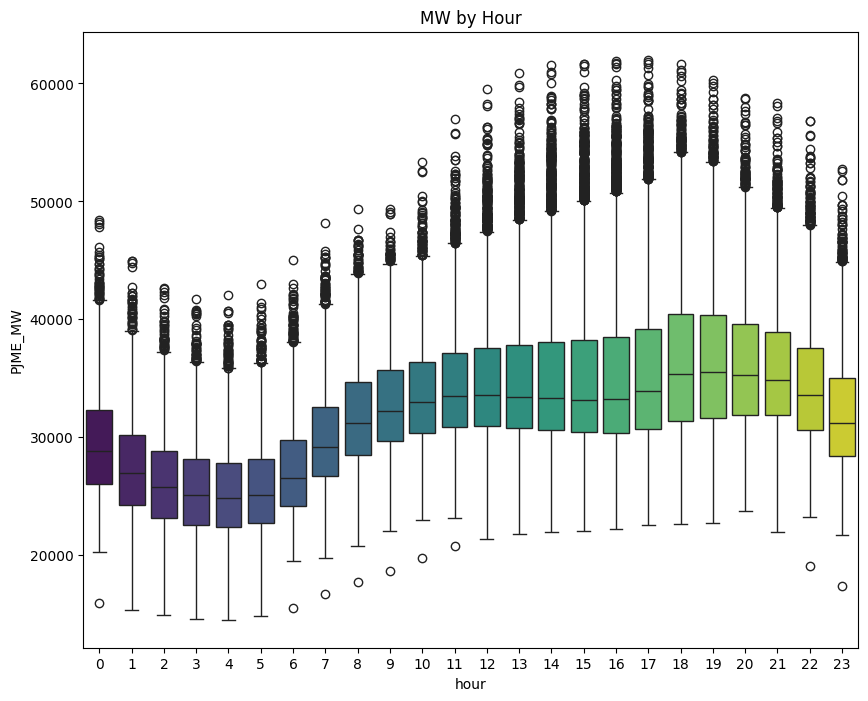

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW', palette='viridis', ax=ax)
ax.set_title('MW by Hour')
plt.show()

C:\Users\himan\AppData\Local\Temp\ipykernel_17708\241046160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hour', y='PJMW_MW', palette='viridis', ax=ax)


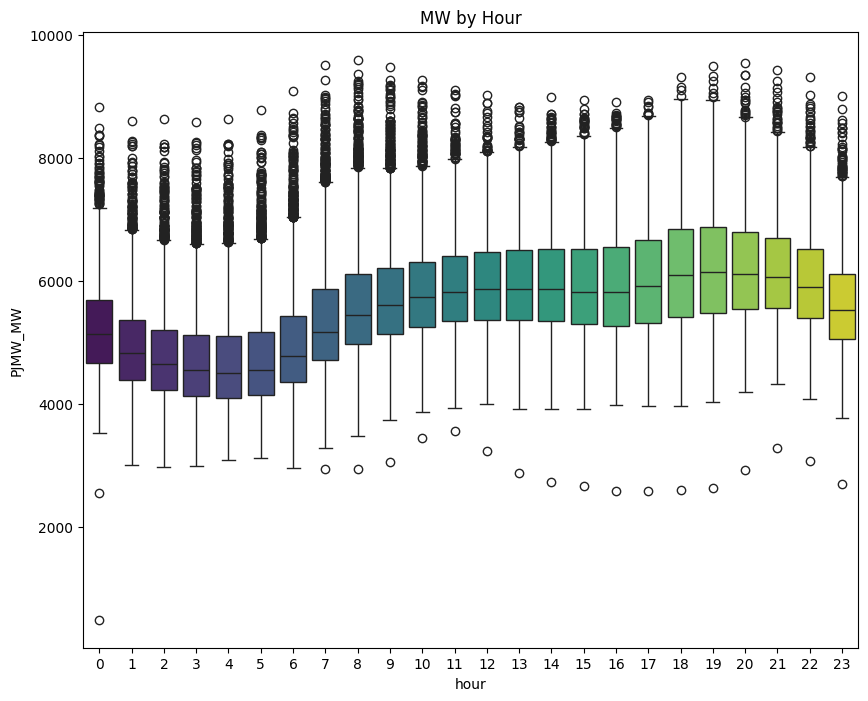

In [46]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJMW_MW', palette='viridis', ax=ax)
ax.set_title('MW by Hour')
plt.show()

C:\Users\himan\AppData\Local\Temp\ipykernel_17708\2640844367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hour', y='PJME_MW', palette='viridis', ax=ax)


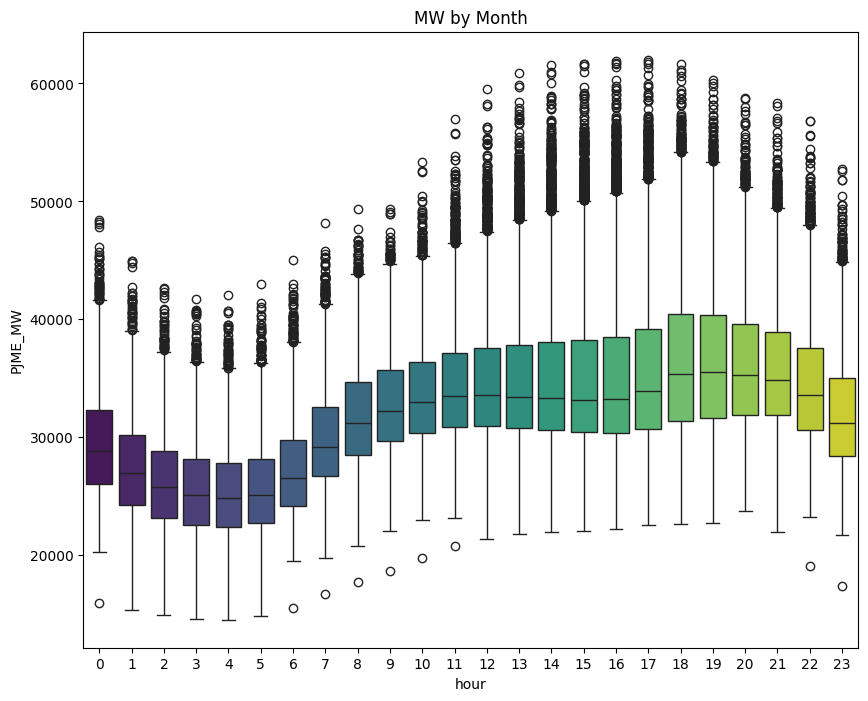

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW', palette='viridis', ax=ax)
ax.set_title('MW by Month')
plt.show()

In [48]:
df.corr()

,PJME_MW,PJMW_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,is_holiday,PJME_PJMW_avg_Consumption
PJME_MW,1.000000,0.875735,0.486544,-0.181610,-0.052564,-0.051075,-0.067921,-0.050389,0.001967,-0.050272,-0.015371,0.997936
PJMW_MW,0.875735,1.000000,0.447301,-0.202957,-0.160037,-0.152504,-0.047030,-0.150996,-0.006056,-0.151686,-0.014932,0.904932
hour,0.486544,0.447301,1.000000,0.000201,-0.000154,-0.000146,-0.000231,-0.000145,0.000016,-0.000149,-0.055914,0.488362
dayofweek,-0.181610,-0.202957,0.000201,1.000000,0.000491,0.000147,0.000490,0.000120,-0.000355,0.000023,-0.032075,-0.187077
quarter,-0.052564,-0.160037,-0.000154,0.000491,1.000000,0.970844,-0.077104,0.967612,0.011740,0.945405,0.007015,-0.067620
month,-0.051075,-0.152504,-0.000146,0.000147,0.970844,1.000000,-0.077501,0.996439,0.010015,0.970051,0.005133,-0.065305
year,-0.067921,-0.047030,-0.000231,0.000490,-0.077104,-0.077501,1.000000,-0.077251,-0.001997,-0.076136,-0.000214,-0.066125
dayofyear,-0.050389,-0.150996,-0.000145,0.000120,0.967612,0.996439,-0.077251,1.000000,0.093998,0.971513,0.004943,-0.064501
dayofmonth,0.001967,-0.006056,0.000016,-0.000355,0.011740,0.010015,-0.001997,0.093998,1.000000,0.067240,-0.003127,0.000928
weekofyear,-0.050272,-0.151686,-0.000149,0.000023,0.945405,0.970051,-0.076136,0.971513,0.067240,1.000000,0.007073,-0.064489


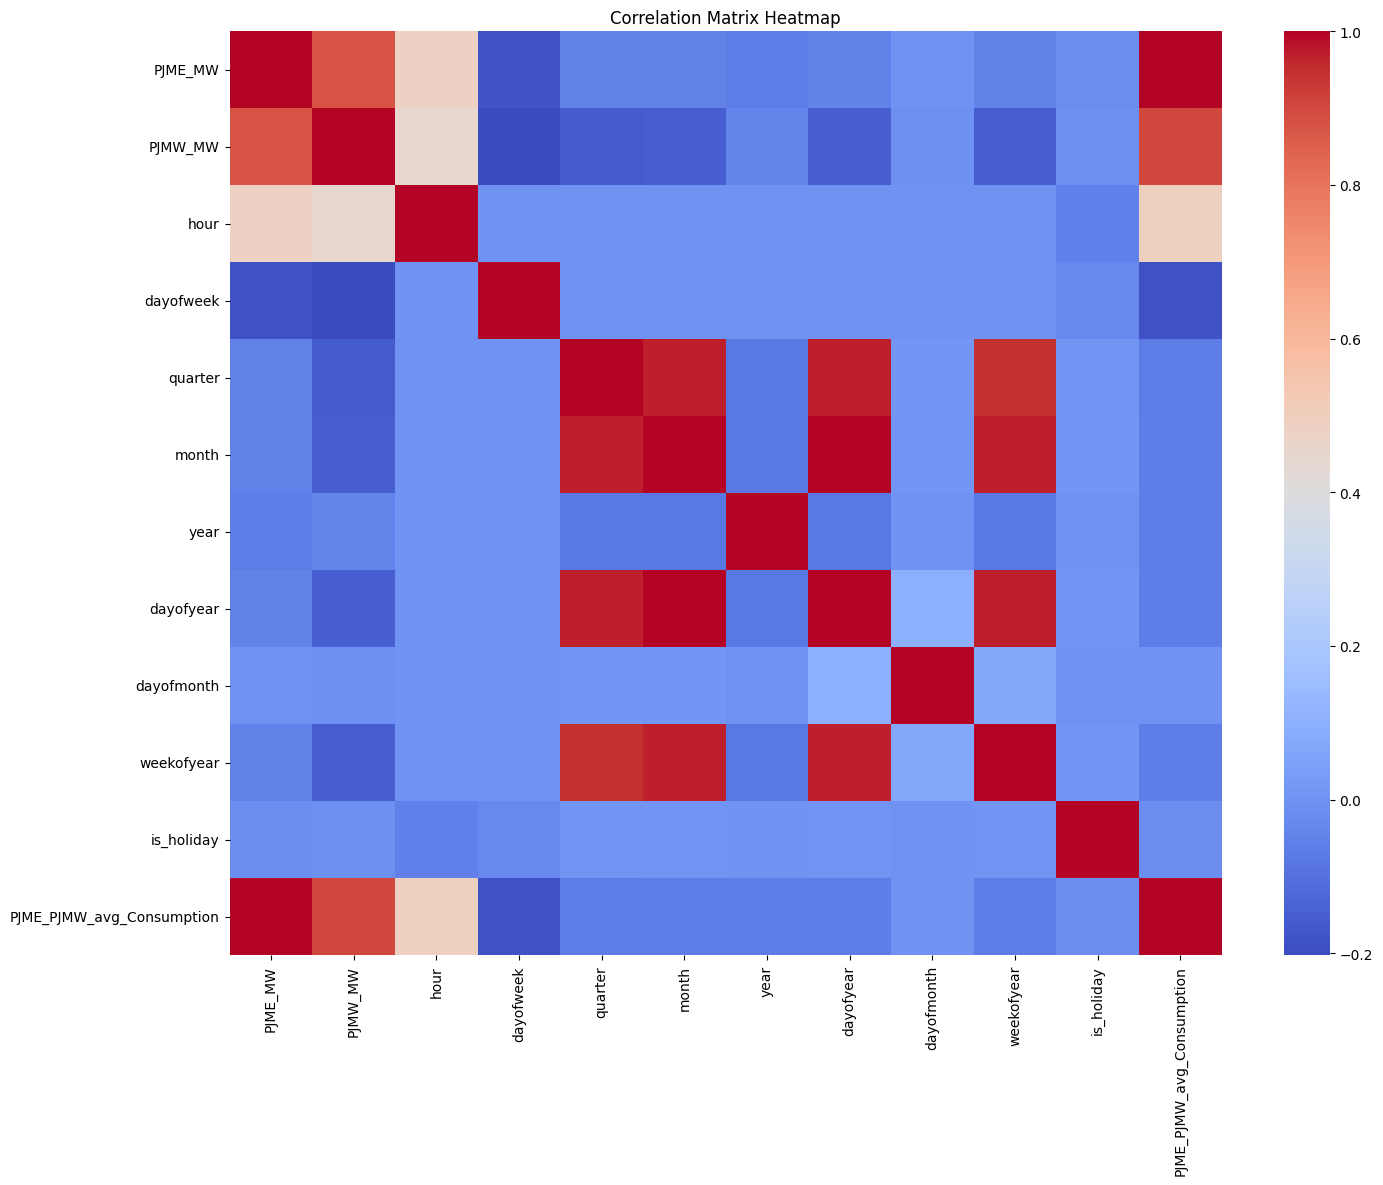

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [50]:
## saving the cleaned data with new features
df.to_parquet(r"C:\Users\himan\Desktop\Projects\Energy_Forecasting_System\data\processed-data\est_hourly_cleaned_with_features.parquet")